In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tslearn.metrics import dtw
import seaborn as sn

In [24]:
egypt_df = pd.read_csv('data/egypt.csv')
france_df = pd.read_csv('data/france.csv')
india_df = pd.read_csv('data/india.csv')
japan_df = pd.read_csv('data/japan.csv')
unitedkingdom_df = pd.read_csv('data/unitedkingdom.csv')
usa_df = pd.read_csv('data/usa.csv')

egypt_df = egypt_df[(egypt_df['date']>='2020-02-15')&(egypt_df['date']<='2020-09-10')].reset_index(drop=True)
france_df = france_df[(france_df['date']>='2020-02-15')&(france_df['date']<='2020-09-10')].reset_index(drop=True)
india_df = india_df[(india_df['date']>='2020-02-15')&(india_df['date']<='2020-09-10')].reset_index(drop=True)
japan_df = japan_df[(japan_df['date']>='2020-02-15')&(japan_df['date']<='2020-09-10')].reset_index(drop=True)
unitedkingdom_df = unitedkingdom_df[(unitedkingdom_df['date']>='2020-02-15')&(unitedkingdom_df['date']<='2020-09-10')].reset_index(drop=True)
usa_df = usa_df[(usa_df['date']>='2020-02-15')&(usa_df['date']<='2020-09-10')].reset_index(drop=True)

covid_metrics = ['new_confirmed', 'new_deceased', 'new_recovered',
       'new_tested', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_tested',
       'new_hospitalized_patients', 'new_intensive_care_patients',
       'new_ventilator_patients', 'cumulative_hospitalized_patients',
       'cumulative_intensive_care_patients', 'cumulative_ventilator_patients',
       'current_hospitalized_patients', 'current_intensive_care_patients',
       'current_ventilator_patients']

egypt_df[covid_metrics] = egypt_df[covid_metrics].fillna(0)
france_df[covid_metrics] = france_df[covid_metrics].fillna(0)
india_df[covid_metrics] = india_df[covid_metrics].fillna(0)
japan_df[covid_metrics] = japan_df[covid_metrics].fillna(0)
unitedkingdom_df[covid_metrics] = unitedkingdom_df[covid_metrics].fillna(0)
usa_df[covid_metrics] = usa_df[covid_metrics].fillna(0)

In [82]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma 

In [34]:
all_dfs = [egypt_df, france_df, india_df, japan_df, unitedkingdom_df, usa_df]
city_names = ['Egypt', 'Paris', 'Mumbai', 'Tokyo', 'Greater London', 'New York County']
mobility_cols = ['mobility_transit_stations', 'mobility_retail_and_recreation',
                 'mobility_grocery_and_pharmacy', 'mobility_parks', 
                 'mobility_residential', 'mobility_workplaces']

In [28]:
def check_null_mobility(df, country_name):
    print(country_name)
    for mobility_col in mobility_cols:
        print(mobility_col)
        print(df[mobility_col].isnull().all())
    print('')

In [30]:
# for df, city_name in zip(all_dfs, city_names):
#     check_null_mobility(df, city_name)

In [107]:
def plot_mobility_and_covid(df, mobility_col, covid_col, city_name):
    plt.title('Mobility vs Covid Cases of '+ city_name)
    plt.xlabel('Day')
    plt.ylabel('Standardized Values')
    plt.plot((df[mobility_col]-df[mobility_col].mean())/df[mobility_col].std())
    plt.plot((df[covid_col]-df[covid_col].mean())/df[covid_col].std())

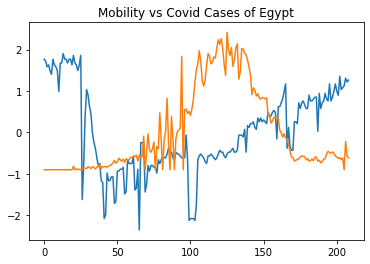

In [33]:
plot_mobility_and_covid(egypt_df, 'mobility_transit_stations', 'new_confirmed', 'Egypt')

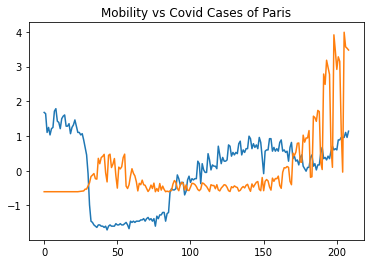

In [35]:
plot_mobility_and_covid(france_df, 'mobility_transit_stations', 'new_confirmed', 'Paris')

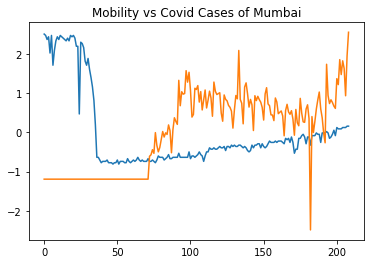

In [36]:
plot_mobility_and_covid(india_df, 'mobility_transit_stations', 'new_confirmed', 'Mumbai')

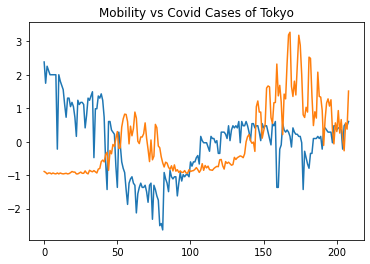

In [37]:
plot_mobility_and_covid(japan_df, 'mobility_transit_stations', 'new_confirmed', 'Tokyo')

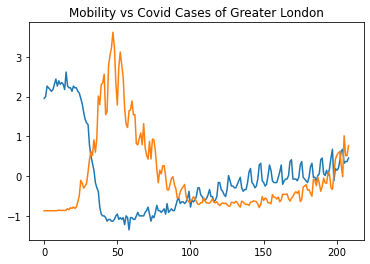

In [38]:
plot_mobility_and_covid(unitedkingdom_df, 'mobility_transit_stations', 'new_confirmed', 'Greater London')

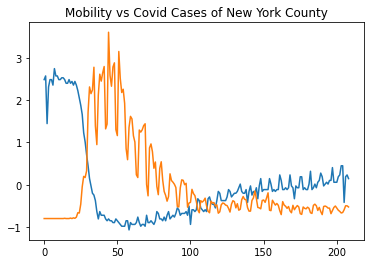

In [39]:
plot_mobility_and_covid(usa_df, 'mobility_transit_stations', 'new_confirmed', 'New York County')

In [47]:
print('Mobility Similarities')
for df, city_name in zip(all_dfs, city_names):
    print('')
    for df2, city_name2 in zip(all_dfs, city_names):
        print(city_name + ' x ' + city_name2)
        print(dtw(df[mobility_cols], df2[mobility_cols]))

Mobility Similarities

Egypt x Egypt
0.0
Egypt x Paris
749.4331190973614
Egypt x Mumbai
1126.0825902215165
Egypt x Tokyo
559.6186201333904
Egypt x Greater London
983.3722591165565
Egypt x New York County
806.3609613566371

Paris x Egypt
749.4331190973614
Paris x Paris
0.0
Paris x Mumbai
791.4107656583906
Paris x Tokyo
729.5786455208239
Paris x Greater London
889.9696624042866
Paris x New York County
606.2087099341283

Mumbai x Egypt
1126.0825902215165
Mumbai x Paris
791.4107656583906
Mumbai x Mumbai
0.0
Mumbai x Tokyo
1062.1449995174858
Mumbai x Greater London
1370.3525093931123
Mumbai x New York County
650.7111494357539

Tokyo x Egypt
559.6186201333904
Tokyo x Paris
729.5786455208239
Tokyo x Mumbai
1062.1449995174858
Tokyo x Tokyo
0.0
Tokyo x Greater London
812.0991318798463
Tokyo x New York County
730.5039356499046

Greater London x Egypt
983.3722591165565
Greater London x Paris
889.9696624042866
Greater London x Mumbai
1370.3525093931123
Greater London x Tokyo
812.0991318798463
Grea

In [48]:
print('New confirmed cases similarity')
for df, city_name in zip(all_dfs, city_names):
    print('')
    for df2, city_name2 in zip(all_dfs, city_names):
        print(city_name + ' x ' + city_name2)
        print(dtw(df['new_confirmed'], df2['new_confirmed']))

New confirmed cases similarity

Egypt x Egypt
0.0
Egypt x Paris
4545.993510774075
Egypt x Mumbai
6588.30661095854
Egypt x Tokyo
6541.91944309925
Egypt x Greater London
2931.4516881572517
Egypt x New York County
4369.360593954223

Paris x Egypt
4545.993510774075
Paris x Paris
0.0
Paris x Mumbai
6226.918419250408
Paris x Tokyo
1328.4058114898473
Paris x Greater London
1568.4696363015767
Paris x New York County
1805.6242687779759

Mumbai x Egypt
6588.30661095854
Mumbai x Paris
6226.918419250408
Mumbai x Mumbai
0.0
Mumbai x Tokyo
9887.494020225751
Mumbai x Greater London
8016.171218231308
Mumbai x New York County
9878.802559014934

Tokyo x Egypt
6541.91944309925
Tokyo x Paris
1328.4058114898473
Tokyo x Mumbai
9887.494020225751
Tokyo x Tokyo
0.0
Tokyo x Greater London
1781.5352929425787
Tokyo x New York County
1079.5420325304615

Greater London x Egypt
2931.4516881572517
Greater London x Paris
1568.4696363015767
Greater London x Mumbai
8016.171218231308
Greater London x Tokyo
1781.535292942

In [ ]:
city_names = ['Egypt', 'Paris', 'Mumbai', 'Tokyo', 'Greater London', 'New York County']
mobility_cols = ['mobility_transit_stations', 'mobility_retail_and_recreation',
                 'mobility_grocery_and_pharmacy', 'mobility_parks', 
                 'mobility_residential', 'mobility_workplaces']

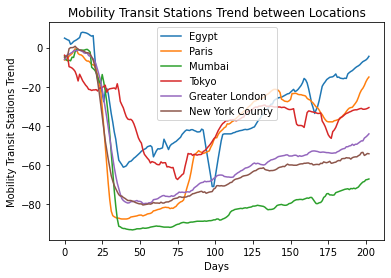

In [88]:
plt.title('Mobility Transit Stations Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Transit Stations Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_transit_stations'],7), label=city_name)
    plt.legend()
plt.savefig('mobility_transit_stations.png')

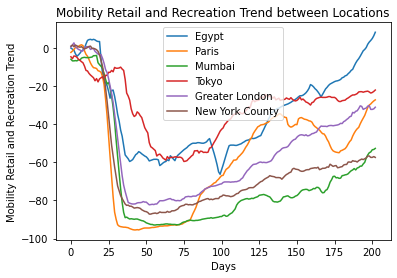

In [89]:
plt.title('Mobility Retail and Recreation Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Retail and Recreation Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_retail_and_recreation'],7), label=city_name)
    plt.legend()
plt.savefig('mobility_retail_and_recreation.png')

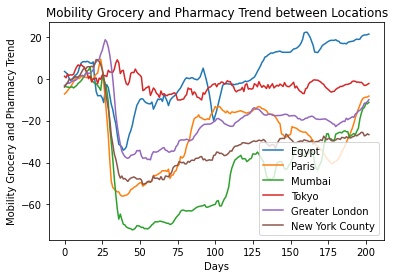

In [90]:
plt.title('Mobility Grocery and Pharmacy Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Grocery and Pharmacy Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_grocery_and_pharmacy'],7), label=city_name)
    plt.legend()
plt.savefig('mobility_grocery_and_pharmacy.png')

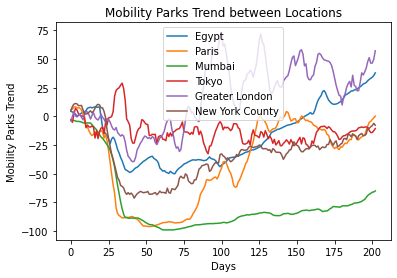

In [106]:
plt.title('Mobility Parks Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Parks Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_parks'], 7), label=city_name)
    plt.legend()
plt.savefig('mobility_parks.png')

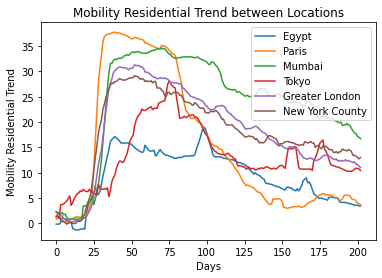

In [92]:
plt.title('Mobility Residential Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Residential Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_residential'], 7), label=city_name)
    plt.legend()
plt.savefig('mobility_residential.png')

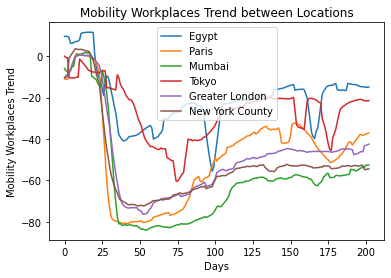

In [93]:
plt.title('Mobility Workplaces Trend between Locations')
plt.xlabel('Days')
plt.ylabel('Mobility Workplaces Trend')
for city_name, df in zip(city_names, all_dfs):
    plt.plot(movingaverage(df['mobility_workplaces'], 7), label=city_name)
    plt.legend()
plt.savefig('mobility_workplaces.png')

Similar mobility trends

In [ ]:
mobility_cols = ['mobility_transit_stations', 'mobility_retail_and_recreation',
                 'mobility_grocery_and_pharmacy', 'mobility_parks', 
                 'mobility_residential', 'mobility_workplaces']

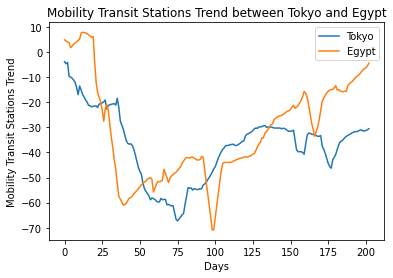

In [94]:
plt.title('Mobility Transit Stations Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Transit Stations Trend')
plt.plot(movingaverage(japan_df['mobility_transit_stations'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_transit_stations'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_transit_stations_comparison.png')

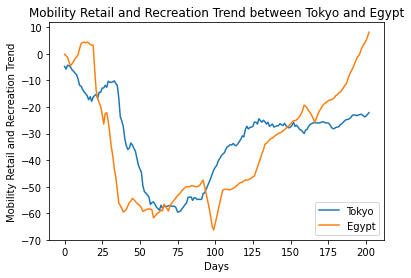

In [95]:
plt.title('Mobility Retail and Recreation Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Retail and Recreation Trend')
plt.plot(movingaverage(japan_df['mobility_retail_and_recreation'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_retail_and_recreation'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_retail_and_recreation_comparison.png')

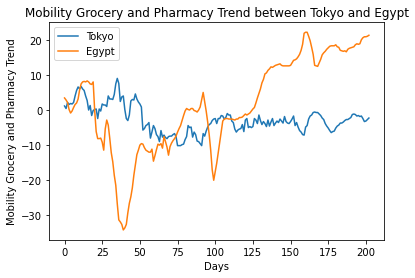

In [97]:
plt.title('Mobility Grocery and Pharmacy Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Grocery and Pharmacy Trend')
plt.plot(movingaverage(japan_df['mobility_grocery_and_pharmacy'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_grocery_and_pharmacy'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_grocery_and_pharmacy_comparison.png')

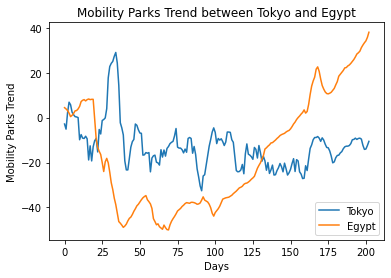

In [96]:
plt.title('Mobility Parks Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Parks Trend')
plt.plot(movingaverage(japan_df['mobility_parks'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_parks'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_parks_comparison.png')

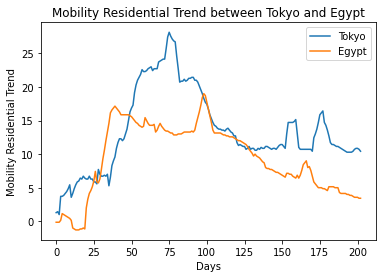

In [98]:
plt.title('Mobility Residential Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Residential Trend')
plt.plot(movingaverage(japan_df['mobility_residential'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_residential'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_residential_comparison.png')

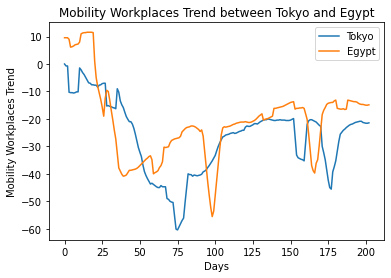

In [99]:
plt.title('Mobility Workplaces Trend between Tokyo and Egypt')
plt.xlabel('Days')
plt.ylabel('Mobility Workplaces Trend')
plt.plot(movingaverage(japan_df['mobility_workplaces'], 7), label='Tokyo')
plt.plot(movingaverage(egypt_df['mobility_workplaces'], 7), label='Egypt')
plt.legend()
plt.savefig('mobility_workplaces_comparison.png')

Least Similar Locations

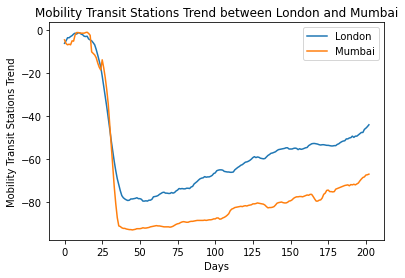

In [100]:
plt.title('Mobility Transit Stations Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Transit Stations Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_transit_stations'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_transit_stations'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_transit_stations_comparison_least.png')

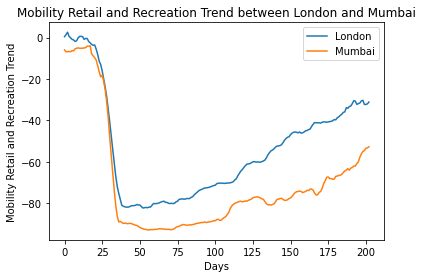

In [101]:
plt.title('Mobility Retail and Recreation Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Retail and Recreation Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_retail_and_recreation'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_retail_and_recreation'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_retail_and_recreation_comparison_least.png')

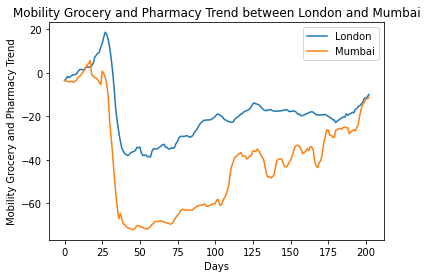

In [102]:
plt.title('Mobility Grocery and Pharmacy Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Grocery and Pharmacy Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_grocery_and_pharmacy'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_grocery_and_pharmacy'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_grocery_and_pharmacy_comparison_least.png')

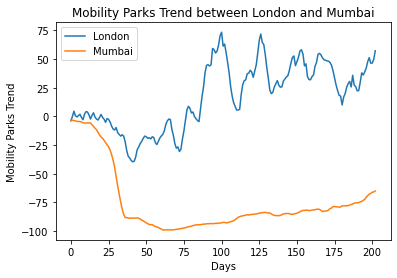

In [103]:
plt.title('Mobility Parks Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Parks Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_parks'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_parks'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_parks_comparison_least.png')

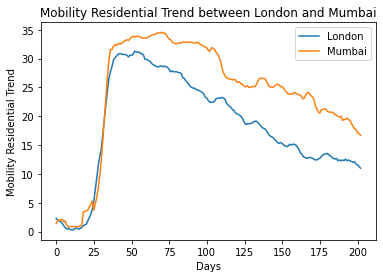

In [104]:
plt.title('Mobility Residential Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Residential Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_residential'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_residential'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_residential_comparison_least.png')

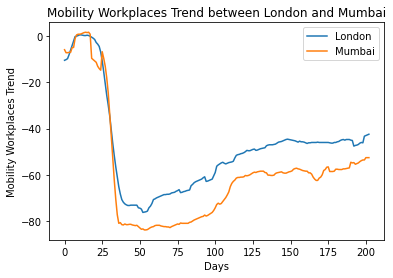

In [105]:
plt.title('Mobility Workplaces Trend between London and Mumbai')
plt.xlabel('Days')
plt.ylabel('Mobility Workplaces Trend')
plt.plot(movingaverage(unitedkingdom_df['mobility_workplaces'], 7), label='London')
plt.plot(movingaverage(india_df['mobility_workplaces'], 7), label='Mumbai')
plt.legend()
plt.savefig('mobility_workplaces_comparison_least.png')

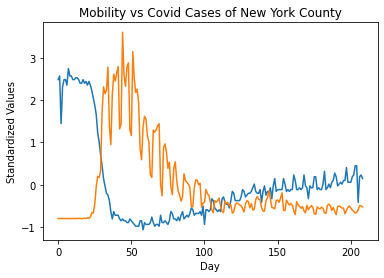

In [115]:
plot_mobility_and_covid(usa_df, 'mobility_transit_stations', 'new_confirmed', 'New York County')

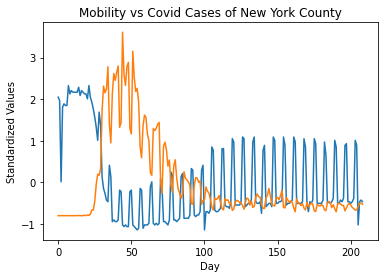

In [113]:
plot_mobility_and_covid(usa_df, 'mobility_workplaces', 'new_confirmed', 'New York County')

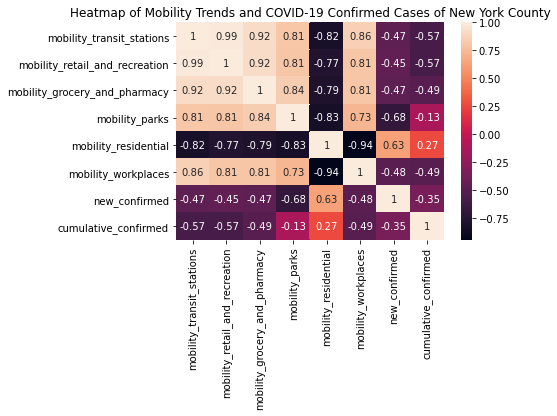

In [144]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of New York County')
sn.heatmap(usa_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_newyork.png',bbox_inches='tight')

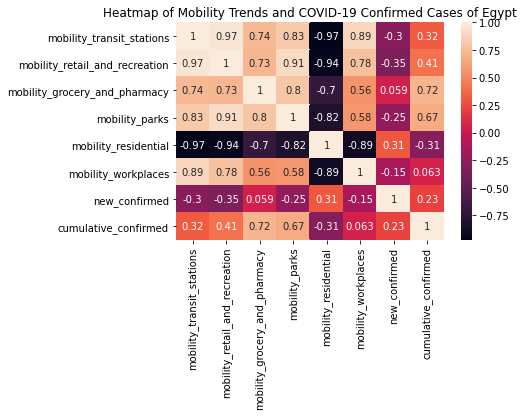

In [145]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of Egypt')
sn.heatmap(egypt_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_egypt.png',bbox_inches='tight')

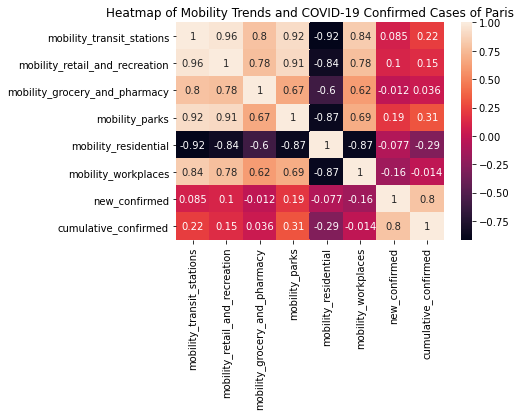

In [146]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of Paris')
sn.heatmap(france_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_paris.png',bbox_inches='tight')

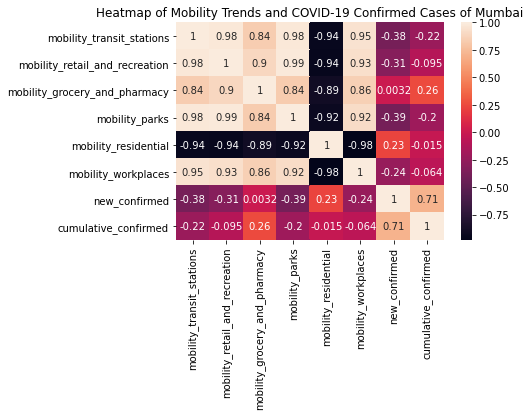

In [147]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of Mumbai')
sn.heatmap(india_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_mumbai.png',bbox_inches='tight')

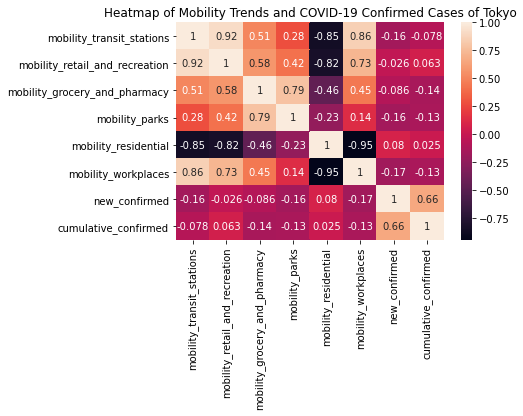

In [148]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of Tokyo')
sn.heatmap(japan_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_tokyo.png',bbox_inches='tight')

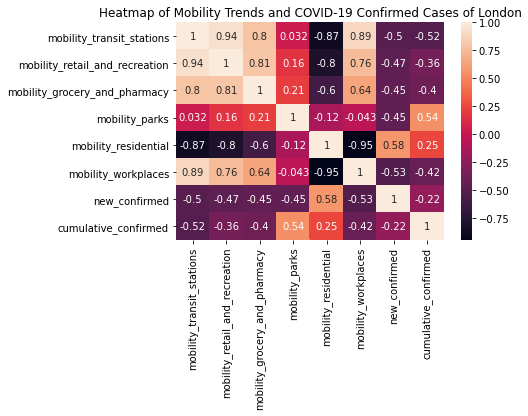

In [149]:
plt.title('Heatmap of Mobility Trends and COVID-19 Confirmed Cases of London')
sn.heatmap(unitedkingdom_df[mobility_cols + ['new_confirmed', 'cumulative_confirmed']].corr(), annot=True)
plt.plot()
plt.savefig('heatmap_london.png',bbox_inches='tight')

In [ ]:
mobility_cols = ['mobility_transit_stations', 'mobility_retail_and_recreation',
                 'mobility_grocery_and_pharmacy', 'mobility_parks', 
                 'mobility_residential', 'mobility_workplaces']

In [ ]:
egypt_df
france_df
india_df
japan_df
unitedkingdom_df
usa_df